## Reading the data

In [52]:
import pandas as pd

# Read the CSV file
df = pd.read_csv(r"C:\Users\mkolla1\OneDrive - Georgia State University\Desktop\Spring 2024\ML\Project\MovieGenre.csv")
df=df.head(5000)

In [54]:
import urllib.request
from PIL import Image
from io import BytesIO

In [55]:
df.drop(columns=[ 'Imdb Link','IMDB Score',], inplace=True)
df.dropna(inplace=True)
df.head(5)


,Unnamed: 0.9,Unnamed: 0.8,Unnamed: 0.7,Unnamed: 0.6,Unnamed: 0.5,Unnamed: 0.4,Unnamed: 0.3,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,imdbId,Title,Genre,Poster
0,0,0,0,0,0,0,0,0,0,0,114709,Toy Story (1995),Animation|Adventure|Comedy,https://images-na.ssl-images-amazon.com/images...
1,1,1,1,1,1,1,1,1,1,1,113497,Jumanji (1995),Action|Adventure|Family,https://images-na.ssl-images-amazon.com/images...
2,2,2,2,2,2,2,2,2,2,2,113228,Grumpier Old Men (1995),Comedy|Romance,https://images-na.ssl-images-amazon.com/images...
3,3,3,3,3,3,3,3,3,3,3,114885,Waiting to Exhale (1995),Comedy|Drama|Romance,https://images-na.ssl-images-amazon.com/images...
4,4,4,4,4,4,4,4,4,4,4,113041,Father of the Bride Part II (1995),Comedy|Family|Romance,https://images-na.ssl-images-amazon.com/images...


In [56]:
df.columns

Index(['Unnamed: 0.9', 'Unnamed: 0.8', 'Unnamed: 0.7', 'Unnamed: 0.6',
       'Unnamed: 0.5', 'Unnamed: 0.4', 'Unnamed: 0.3', 'Unnamed: 0.2',
       'Unnamed: 0.1', 'Unnamed: 0', 'imdbId', 'Title', 'Genre', 'Poster'],
      dtype='object')

## One Hot Encoding

In [57]:
df['Genre'] = df['Genre'].str.split('|')

# Get all unique genres
unique_genres = set()
for genres in df['Genre']:
    unique_genres.update(genres)

for genre in unique_genres:
    df[genre] = df['Genre'].apply(lambda x: 1 if genre in x else 0)

# Drop the original 'Genres' column if needed
df.drop('Genre', axis=1, inplace=True)

df.head(5)


,Unnamed: 0.9,Unnamed: 0.8,Unnamed: 0.7,Unnamed: 0.6,Unnamed: 0.5,Unnamed: 0.4,Unnamed: 0.3,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,...,Documentary,Drama,Family,Biography,Comedy,Fantasy,Animation,Sport,Horror,Film-Noir
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
1,1,1,1,1,1,1,1,1,1,1,...,0,0,1,0,0,0,0,0,0,0
2,2,2,2,2,2,2,2,2,2,2,...,0,0,0,0,1,0,0,0,0,0
3,3,3,3,3,3,3,3,3,3,3,...,0,1,0,0,1,0,0,0,0,0
4,4,4,4,4,4,4,4,4,4,4,...,0,0,1,0,1,0,0,0,0,0


In [58]:
df.isnull().sum()

Unnamed: 0.9    0
Unnamed: 0.8    0
Unnamed: 0.7    0
Unnamed: 0.6    0
Unnamed: 0.5    0
Unnamed: 0.4    0
Unnamed: 0.3    0
Unnamed: 0.2    0
Unnamed: 0.1    0
Unnamed: 0      0
imdbId          0
Title           0
Poster          0
Western         0
Romance         0
Musical         0
Crime           0
Music           0
War             0
Adventure       0
Short           0
Thriller        0
Mystery         0
History         0
Action          0
Sci-Fi          0
Documentary     0
Drama           0
Family          0
Biography       0
Comedy          0
Fantasy         0
Animation       0
Sport           0
Horror          0
Film-Noir       0
dtype: int64

In [59]:
for x in df.columns:
    if x != 'imdbId':
        df.drop(columns={x},inplace=True)
    if x=='imdbId':
        break

In [60]:
df.columns

Index(['imdbId', 'Title', 'Poster', 'Western', 'Romance', 'Musical', 'Crime',
       'Music', 'War', 'Adventure', 'Short', 'Thriller', 'Mystery', 'History',
       'Action', 'Sci-Fi', 'Documentary', 'Drama', 'Family', 'Biography',
       'Comedy', 'Fantasy', 'Animation', 'Sport', 'Horror', 'Film-Noir'],
      dtype='object')

In [12]:
import matplotlib.pyplot as plt
data=df.iloc[:,3:]

## Stacked bar Plot before and after removing minimal genres

<Figure size 1000x600 with 0 Axes>

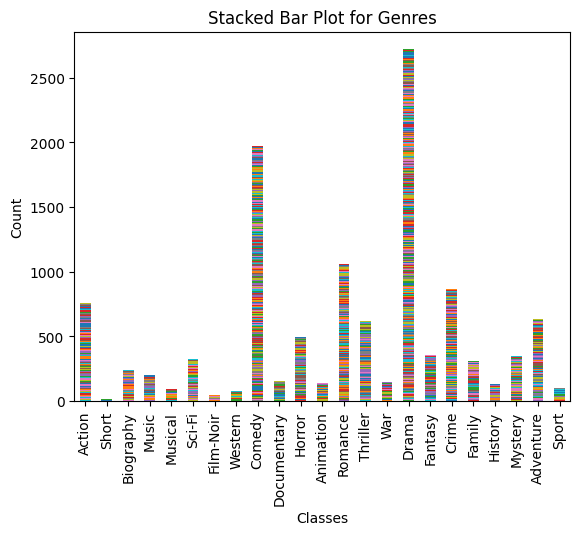

In [37]:
# Stacked Bar Plot
plt.figure(figsize=(10, 6))
data.T.plot(kind='bar', stacked=True)
plt.xlabel('Classes')
plt.ylabel('Count')
plt.title('Stacked Bar Plot for Genres')
plt.xticks(rotation=90)
plt.legend().remove()
#plt.legend(title='Index', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [61]:
average_count = data.sum(axis=0).mean()
print(average_count)

513.695652173913


In [62]:
value_counts = df.iloc[:,3:].apply(pd.value_counts)

# Define a threshold for the value counts
threshold = average_count  # Adjust this threshold based on your criteria

# Identify columns where the value counts are below the threshold
columns_to_drop = value_counts.columns[value_counts.min() < threshold]

# Drop the identified columns from the DataFrame
df = df.drop(columns=columns_to_drop)

C:\Users\mkolla1\AppData\Local\Temp\ipykernel_24712\919543114.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  value_counts = df.iloc[:,3:].apply(pd.value_counts)


In [63]:
for x in df.columns:
    if x != 'imdbId':
        df.drop(columns={x},inplace=True)
    if x=='imdbId':
        break

In [64]:
df.columns

Index(['imdbId', 'Title', 'Poster', 'Romance', 'Crime', 'Adventure',
       'Thriller', 'Action', 'Drama', 'Comedy'],
      dtype='object')

<Figure size 1000x600 with 0 Axes>

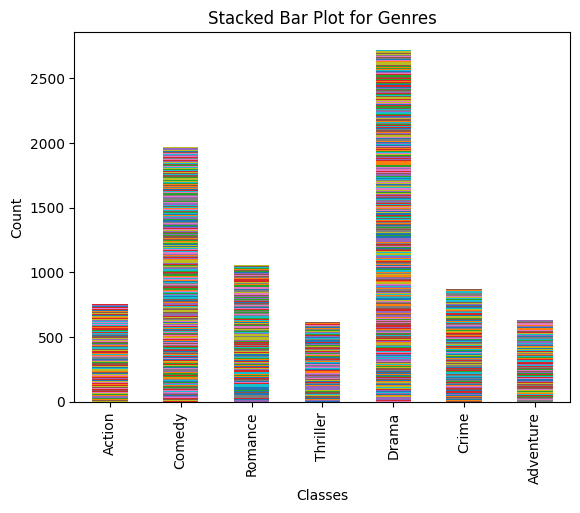

In [42]:
# Heatmap
import matplotlib.pyplot as plt
data=df.iloc[:,3:]

# Stacked Bar Plot
plt.figure(figsize=(10, 6))
data.T.plot(kind='bar', stacked=True)
plt.xlabel('Classes')
plt.ylabel('Count')
plt.title('Stacked Bar Plot for Genres')
plt.xticks(rotation=90)
plt.legend().remove()
#plt.legend(title='Index', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [38]:
df.columns

Index(['imdbId', 'Title', 'Poster', 'Romance', 'Crime', 'Adventure',
       'Thriller', 'Action', 'Drama', 'Comedy'],
      dtype='object')

## Original Model Architecture

In [65]:
import tensorflow as tf

class LeNetOriginal(tf.keras.Model):
    """The Original LeNet-5 model."""
    def __init__(self, num_classes):
        super().__init__()
        self.conv1 = tf.keras.layers.Conv2D(filters=6, kernel_size=5,  # Adjust kernel size to 5x5
                                             activation='sigmoid', padding='same')
        #self.pad1 = tf.keras.layers.ZeroPadding2D(padding=2)
        self.pool1 = tf.keras.layers.MaxPooling2D(pool_size=2, strides=2)

        self.conv2 = tf.keras.layers.Conv2D(filters=16, kernel_size=5,  # Adjust kernel size to 5x5
                                             activation='sigmoid', padding='valid')
        self.pool2 = tf.keras.layers.MaxPooling2D(pool_size=2, strides=2)
        self.flatten = tf.keras.layers.Flatten()

        self.fc1 = tf.keras.layers.Dense(120, activation='sigmoid')
        self.fc2 = tf.keras.layers.Dense(84, activation='sigmoid')
        #self.fc3 = tf.keras.layers.Dense(10)
        self.fc3 = tf.keras.layers.Dense(num_classes, activation='softmax')

    def call(self, inputs):
        # Reshape inputs to match the expected input shape (32, 32, 1)
        inputs = tf.reshape(inputs, [-1, 224, 224, 1])
        x = self.conv1(inputs)
        #x = self.pad1(x)
        x = self.pool1(x)

        x = self.conv2(x)
        x = self.pool2(x)
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.fc2(x)
        x = self.fc3(x)
        return x


## Modified Model Architecture -1 reducing the number of neurons

In [96]:
import tensorflow as tf

class LeNetModified(tf.keras.Model):
    """The LeNet modified model with two hidden layers with neurons 120 and 40(changed) model."""
    def __init__(self, num_classes):
        super().__init__()
        self.conv1 = tf.keras.layers.Conv2D(filters=6, kernel_size=5,  # Adjust kernel size to 5x5
                                             activation='sigmoid', padding='same')
        #self.pad1 = tf.keras.layers.ZeroPadding2D(padding=2)
        self.pool1 = tf.keras.layers.AveragePooling2D(pool_size=2, strides=2)

        self.conv2 = tf.keras.layers.Conv2D(filters=16, kernel_size=5,  # Adjust kernel size to 5x5
                                             activation='sigmoid', padding='valid')
        self.pool2 = tf.keras.layers.AveragePooling2D(pool_size=2, strides=2)
        self.flatten = tf.keras.layers.Flatten()

        self.fc1 = tf.keras.layers.Dense(60, activation='sigmoid')
        self.fc2 = tf.keras.layers.Dense(20, activation='sigmoid')
        #self.fc3 = tf.keras.layers.Dense(10)
        self.fc3 = tf.keras.layers.Dense(num_classes, activation='softmax')

    def call(self, inputs):
        # Reshape inputs to match the expected input shape (32, 32, 1)
        inputs = tf.reshape(inputs, [-1, 224, 224, 1])
        x = self.conv1(inputs)
        #x = self.pad1(x)
        x = self.pool1(x)

        x = self.conv2(x)
        x = self.pool2(x)
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.fc2(x)
        x = self.fc3(x)
        return x


## Modified Model Architecture -2 reducing the number of neurons and layers

In [67]:
import tensorflow as tf

class LeNetModified2(tf.keras.Model):
    """The LeNet modified with  model."""
    def __init__(self, num_classes):
        super().__init__()
        self.conv1 = tf.keras.layers.Conv2D(filters=6, kernel_size=5,  # Adjust kernel size to 5x5
                                             activation='sigmoid', padding='same')
        #self.pad1 = tf.keras.layers.ZeroPadding2D(padding=2)
        self.pool1 = tf.keras.layers.MaxPooling2D(pool_size=2, strides=2)

        self.conv2 = tf.keras.layers.Conv2D(filters=16, kernel_size=5,  # Adjust kernel size to 5x5
                                             activation='sigmoid', padding='valid')
        self.pool2 = tf.keras.layers.MaxPooling2D(pool_size=2, strides=2)
        self.flatten = tf.keras.layers.Flatten()

        self.fc1 = tf.keras.layers.Dense(120, activation='sigmoid')
        self.fc2 = tf.keras.layers.Dense(84, activation='sigmoid')
        self.fc3 = tf.keras.layers.Dense(42, activation='sigmoid')
        #self.fc3 = tf.keras.layers.Dense(10)
        self.fc4 = tf.keras.layers.Dense(num_classes, activation='softmax')

    def call(self, inputs):
        # Reshape inputs to match the expected input shape (32, 32, 1)
        inputs = tf.reshape(inputs, [-1, 224, 224, 1])
        x = self.conv1(inputs)
        #x = self.pad1(x)
        x = self.pool1(x)

        x = self.conv2(x)
        x = self.pool2(x)
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.fc2(x)
        x = self.fc3(x)
        x = self.fc4(x)
        return x


## Image Processing

In [68]:
import tensorflow as tf
from PIL import Image
import numpy as np
import os
from sklearn.model_selection import train_test_split

# Function to preprocess image
def preprocess_image(image_path):
    # Open image
    try:
      with urllib.request.urlopen(image_path) as response:
          data = response.read()
          img = Image.open(BytesIO(data))
    except:
        img = Image.open(image_path)
    #img = Image.open(image_path)
    # Resize to 32x32 pixels
    img = img.resize((224, 224))
    img = img.convert('RGB')
        # Convert to grayscale
    #img = img.convert('HSV')
        # Convert image to numpy array
    img = img.convert('L')
    img_array = np.array(img)
        # Normalize pixel values to [0, 1]
    img_array = img_array / 255.0
        # Add batch dimension
    img_array = np.expand_dims(img_array, axis=0)
    return img_array



# Load LeNet model
X = []  # List of preprocessed images
  # List of corresponding genres
for index, row in df.iterrows():
    image_path = row['Poster']  # Assuming 'image_path' contains the file paths of images
    #genre = row[3:]  # Assuming 'genre' contains the genre labels
    try:
      preprocessed_image = preprocess_image(image_path)
      X.append(preprocessed_image)
    except:
       df.drop(df[df['Poster'] == image_path].index, inplace=True)
       pass
    
# # Create binary columns for each unique genre

## Train test Split

In [69]:
y = df.iloc[:,3:].to_numpy()
    #y.append(genre)
print("array denotion")
# Convert lists to numpy arrays
X = np.array(X)
y = np.array(y)
# np.save('preprocess_images.npy', X)
# np.save('labels.npy', y)
print("splitting")
# 2. Split the data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=43)



array denotion
splitting


### Model -1 Training and Accuracy

In [75]:
#Training with GreyScale

print("model") 
# 3. Define your model architecture (assuming LeNet)
model6 = LeNetOriginal(num_classes=len(df.iloc[:,3:].columns))
print("compiling")
# 4. Compile the model
model6.compile(optimizer='SGD',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

print("fitting model")
# 5. Train the model
print(X_train.shape, y_train.shape)
history6 = model6.fit(X_train, y_train, epochs=50, batch_size=16,validation_data=(X_val, y_val))
#epoch 5, batch size=16: 64.16
print("eval")
# 6. Evaluate the model
loss, accuracy = model6.evaluate(X_val, y_val)
print("Validation accuracy:", accuracy)

model
compiling
fitting model
(3148, 1, 224, 224) (3148, 7)
Epoch 1/50
197/197 ━━━━━━━━━━━━━━━━━━━━ 9s 42ms/step - accuracy: 0.2120 - loss: 3.3338 - val_accuracy: 0.2272 - val_loss: 3.2458
Epoch 2/50
197/197 ━━━━━━━━━━━━━━━━━━━━ 8s 40ms/step - accuracy: 0.2240 - loss: 3.3178 - val_accuracy: 0.2272 - val_loss: 3.2742
Epoch 3/50
197/197 ━━━━━━━━━━━━━━━━━━━━ 8s 41ms/step - accuracy: 0.2441 - loss: 3.3437 - val_accuracy: 0.2272 - val_loss: 3.2644
Epoch 4/50
197/197 ━━━━━━━━━━━━━━━━━━━━ 8s 39ms/step - accuracy: 0.2314 - loss: 3.3555 - val_accuracy: 0.2272 - val_loss: 3.3335
Epoch 5/50
197/197 ━━━━━━━━━━━━━━━━━━━━ 8s 40ms/step - accuracy: 0.2476 - loss: 3.3022 - val_accuracy: 0.2272 - val_loss: 3.2600
Epoch 6/50
197/197 ━━━━━━━━━━━━━━━━━━━━ 8s 40ms/step - accuracy: 0.2294 - loss: 3.2948 - val_accuracy: 0.2272 - val_loss: 3.3426
Epoch 7/50
197/197 ━━━━━━━━━━━━━━━━━━━━ 11s 55ms/step - accuracy: 0.2382 - loss: 3.3345 - val_accuracy: 0.2272 - val_loss: 3.2810
Epoch 8/50
197/197 ━━━━━━━━━━━━━━━━━

In [70]:
#Training with GreyScale

print("model") 
# 3. Define your model architecture (assuming LeNet)
model3 = LeNetOriginal(num_classes=len(df.iloc[:,3:].columns))
print("compiling")
# 4. Compile the model
model3.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

print("fitting model")
# 5. Train the model
print(X_train.shape, y_train.shape)
history3 = model3.fit(X_train, y_train, epochs=5, batch_size=16,validation_data=(X_val, y_val))
#epoch 5, batch size=16: 64.16
print("eval")
# 6. Evaluate the model
loss, accuracy = model3.evaluate(X_val, y_val)
print("Validation accuracy:", accuracy)

model
compiling
fitting model
(3148, 1, 224, 224) (3148, 7)
Epoch 1/5
197/197 ━━━━━━━━━━━━━━━━━━━━ 14s 66ms/step - accuracy: 0.2462 - loss: 3.1507 - val_accuracy: 0.2272 - val_loss: 3.1895
Epoch 2/5
197/197 ━━━━━━━━━━━━━━━━━━━━ 13s 67ms/step - accuracy: 0.2355 - loss: 3.2198 - val_accuracy: 0.2272 - val_loss: 3.1929
Epoch 3/5
197/197 ━━━━━━━━━━━━━━━━━━━━ 13s 68ms/step - accuracy: 0.2259 - loss: 3.1928 - val_accuracy: 0.1117 - val_loss: 3.2079
Epoch 4/5
197/197 ━━━━━━━━━━━━━━━━━━━━ 14s 71ms/step - accuracy: 0.2342 - loss: 3.2447 - val_accuracy: 0.2272 - val_loss: 3.1702
Epoch 5/5
197/197 ━━━━━━━━━━━━━━━━━━━━ 16s 80ms/step - accuracy: 0.2373 - loss: 3.2431 - val_accuracy: 0.2272 - val_loss: 3.1866
eval
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.2221 - loss: 3.2928
Validation accuracy: 0.2271573543548584


In [83]:
#Training with GreyScale
from tensorflow.keras import layers, models, optimizers

print("model") 
# 3. Define your model architecture (assuming LeNet)
model3 = LeNetOriginal(num_classes=len(df.iloc[:,3:].columns))
print("compiling")
# 4. Compile the model
optimizer = optimizers.SGD(learning_rate=0.0001)
model3.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

print("fitting model")
# 5. Train the model
print(X_train.shape, y_train.shape)
history3 = model3.fit(X_train, y_train, epochs=15, batch_size=16,validation_data=(X_val, y_val))
#epoch 5, batch size=16: 64.16
print("eval")
# 6. Evaluate the model
loss, accuracy = model3.evaluate(X_val, y_val)
print("Validation accuracy:", accuracy)

model
compiling
fitting model
(3148, 1, 224, 224) (3148, 7)
Epoch 1/15
197/197 ━━━━━━━━━━━━━━━━━━━━ 11s 54ms/step - accuracy: 0.1127 - loss: 3.4623 - val_accuracy: 0.1117 - val_loss: 3.2913
Epoch 2/15
197/197 ━━━━━━━━━━━━━━━━━━━━ 11s 56ms/step - accuracy: 0.1045 - loss: 3.2869 - val_accuracy: 0.1117 - val_loss: 3.2219
Epoch 3/15
197/197 ━━━━━━━━━━━━━━━━━━━━ 11s 57ms/step - accuracy: 0.1083 - loss: 3.1961 - val_accuracy: 0.1117 - val_loss: 3.1902
Epoch 4/15
197/197 ━━━━━━━━━━━━━━━━━━━━ 14s 70ms/step - accuracy: 0.1110 - loss: 3.1856 - val_accuracy: 0.2272 - val_loss: 3.1729
Epoch 5/15
197/197 ━━━━━━━━━━━━━━━━━━━━ 12s 61ms/step - accuracy: 0.2505 - loss: 3.1201 - val_accuracy: 0.2272 - val_loss: 3.1624
Epoch 6/15
197/197 ━━━━━━━━━━━━━━━━━━━━ 11s 57ms/step - accuracy: 0.2372 - loss: 3.1654 - val_accuracy: 0.2272 - val_loss: 3.1558
Epoch 7/15
197/197 ━━━━━━━━━━━━━━━━━━━━ 11s 57ms/step - accuracy: 0.2426 - loss: 3.1589 - val_accuracy: 0.2272 - val_loss: 3.1519
Epoch 8/15
197/197 ━━━━━━━━━━━

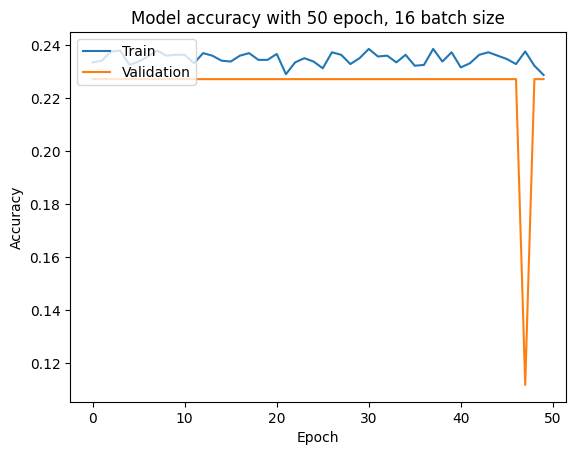

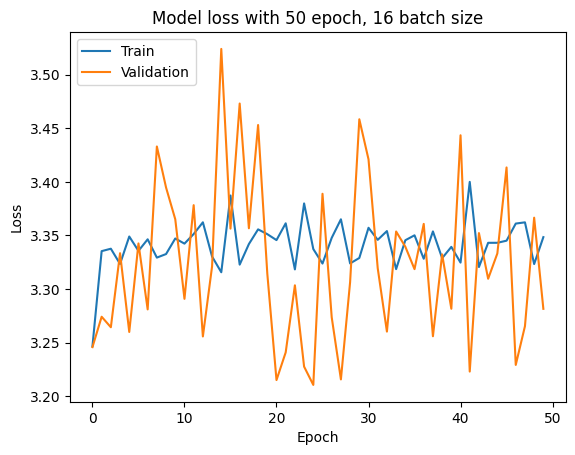

In [78]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values  
plt.plot(history6.history['accuracy'])
plt.plot(history6.history['val_accuracy'])
plt.title(f'Model accuracy with 50 epoch, 16 batch size')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history6.history['loss'])
plt.plot(history6.history['val_loss'])
plt.title('Model loss with 50 epoch, 16 batch size')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


### Model -2 Training and Accuracy (SGD and Adam)

In [102]:
#Training with GreyScale
from tensorflow.keras import layers, models, optimizers
print("model") 
# 3. Define your model architecture (assuming LeNet)
model4 = LeNetModified(num_classes=len(df.iloc[:,3:].columns))
print("compiling")
# 4. Compile the model
optimizer = optimizers.SGD(learning_rate=0.0001)
model4.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

print("fitting model")
# 5. Train the model
print(X_train.shape, y_train.shape)
history4 = model4.fit(X_train, y_train, epochs=5, batch_size=64,validation_data=(X_val, y_val))
#epoch 5, batch size=16: 64.16
print("eval")
# 6. Evaluate the model
loss, accuracy = model4.evaluate(X_val, y_val)
print("Validation accuracy:", accuracy)

model
compiling
fitting model
(3148, 1, 224, 224) (3148, 7)
Epoch 1/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 7s 136ms/step - accuracy: 0.1199 - loss: 3.7190 - val_accuracy: 0.1117 - val_loss: 3.6596
Epoch 2/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 9s 170ms/step - accuracy: 0.1090 - loss: 3.6259 - val_accuracy: 0.1117 - val_loss: 3.5962
Epoch 3/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 9s 177ms/step - accuracy: 0.1119 - loss: 3.5860 - val_accuracy: 0.1117 - val_loss: 3.5484
Epoch 4/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 9s 178ms/step - accuracy: 0.1190 - loss: 3.5746 - val_accuracy: 0.1117 - val_loss: 3.5116
Epoch 5/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 9s 175ms/step - accuracy: 0.1049 - loss: 3.5532 - val_accuracy: 0.1117 - val_loss: 3.4820
eval
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.1296 - loss: 3.5281
Validation accuracy: 0.11167512834072113


In [98]:
#Training with GreyScale

print("model") 
# 3. Define your model architecture (assuming LeNet)
model4 = LeNetModified(num_classes=len(df.iloc[:,3:].columns))
print("compiling")
# 4. Compile the model
model4.compile(optimizer='SGD',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

print("fitting model")
# 5. Train the model
print(X_train.shape, y_train.shape)
history4 = model4.fit(X_train, y_train, epochs=5, batch_size=16,validation_data=(X_val, y_val))
#epoch 5, batch size=16: 64.16
print("eval")
# 6. Evaluate the model
loss, accuracy = model4.evaluate(X_val, y_val)
print("Validation accuracy:", accuracy)

model
compiling
fitting model
(3148, 1, 224, 224) (3148, 7)
Epoch 1/5
197/197 ━━━━━━━━━━━━━━━━━━━━ 8s 41ms/step - accuracy: 0.2035 - loss: 3.2883 - val_accuracy: 0.2272 - val_loss: 3.1952
Epoch 2/5
197/197 ━━━━━━━━━━━━━━━━━━━━ 9s 45ms/step - accuracy: 0.2348 - loss: 3.2221 - val_accuracy: 0.2272 - val_loss: 3.2809
Epoch 3/5
197/197 ━━━━━━━━━━━━━━━━━━━━ 9s 47ms/step - accuracy: 0.2330 - loss: 3.2970 - val_accuracy: 0.2272 - val_loss: 3.2629
Epoch 4/5
197/197 ━━━━━━━━━━━━━━━━━━━━ 9s 45ms/step - accuracy: 0.2335 - loss: 3.2998 - val_accuracy: 0.2272 - val_loss: 3.2955
Epoch 5/5
197/197 ━━━━━━━━━━━━━━━━━━━━ 9s 47ms/step - accuracy: 0.2355 - loss: 3.3103 - val_accuracy: 0.2272 - val_loss: 3.2925
eval
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.2221 - loss: 3.4229
Validation accuracy: 0.2271573543548584


In [103]:
#Training with GreyScale

print("model") 
# 3. Define your model architecture (assuming LeNet)
model4 = LeNetModified(num_classes=len(df.iloc[:,3:].columns))
print("compiling")
# 4. Compile the model

model4.compile(optimizer='SGD',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

print("fitting model")
# 5. Train the model
print(X_train.shape, y_train.shape)
history4 = model4.fit(X_train, y_train, epochs=5, batch_size=32,validation_data=(X_val, y_val))

print("eval")
# 6. Evaluate the model
loss, accuracy = model4.evaluate(X_val, y_val)
print("Validation accuracy:", accuracy)

model
compiling
fitting model
(3148, 1, 224, 224) (3148, 7)
Epoch 1/5
99/99 ━━━━━━━━━━━━━━━━━━━━ 8s 73ms/step - accuracy: 0.2279 - loss: 3.1875 - val_accuracy: 0.2272 - val_loss: 3.1816
Epoch 2/5
99/99 ━━━━━━━━━━━━━━━━━━━━ 7s 71ms/step - accuracy: 0.2416 - loss: 3.2130 - val_accuracy: 0.2272 - val_loss: 3.2283
Epoch 3/5
99/99 ━━━━━━━━━━━━━━━━━━━━ 7s 71ms/step - accuracy: 0.2443 - loss: 3.1780 - val_accuracy: 0.2272 - val_loss: 3.2456
Epoch 4/5
99/99 ━━━━━━━━━━━━━━━━━━━━ 7s 73ms/step - accuracy: 0.2349 - loss: 3.2859 - val_accuracy: 0.2272 - val_loss: 3.2610
Epoch 5/5
99/99 ━━━━━━━━━━━━━━━━━━━━ 7s 75ms/step - accuracy: 0.2344 - loss: 3.2745 - val_accuracy: 0.2272 - val_loss: 3.2783
eval
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.2221 - loss: 3.4040
Validation accuracy: 0.2271573543548584


In [106]:
#Training with GreyScale

print("model") 
# 3. Define your model architecture (assuming LeNet)
model4 = LeNetModified(num_classes=len(df.iloc[:,3:].columns))
print("compiling")
# 4. Compile the model
optimizer = optimizers.Adam(learning_rate=0.0001)
model4.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

print("fitting model")
# 5. Train the model
print(X_train.shape, y_train.shape)
history4 = model4.fit(X_train, y_train, epochs=15, batch_size=64,validation_data=(X_val, y_val))

print("eval")
# 6. Evaluate the model
loss, accuracy = model4.evaluate(X_val, y_val)
print("Validation accuracy:", accuracy)

model
compiling
fitting model
(3148, 1, 224, 224) (3148, 7)
Epoch 1/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 11s 194ms/step - accuracy: 0.2343 - loss: 3.2811 - val_accuracy: 0.2272 - val_loss: 3.2428
Epoch 2/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 9s 185ms/step - accuracy: 0.2426 - loss: 3.2015 - val_accuracy: 0.2272 - val_loss: 3.2341
Epoch 3/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 9s 176ms/step - accuracy: 0.2417 - loss: 3.2354 - val_accuracy: 0.2272 - val_loss: 3.2236
Epoch 4/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 9s 176ms/step - accuracy: 0.2340 - loss: 3.2477 - val_accuracy: 0.2272 - val_loss: 3.2167
Epoch 5/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 9s 173ms/step - accuracy: 0.2295 - loss: 3.2268 - val_accuracy: 0.2272 - val_loss: 3.2093
Epoch 6/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 9s 176ms/step - accuracy: 0.2504 - loss: 3.1559 - val_accuracy: 0.2272 - val_loss: 3.2032
Epoch 7/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 11s 218ms/step - accuracy: 0.2306 - loss: 3.1789 - val_accuracy: 0.2272 - val_loss: 3.1989
Epoch 8/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 12s 

### Model -3 Training and testing 

In [113]:

print("model") 
# 3. Define your model architecture (assuming LeNet)
model1 = LeNetModified2(num_classes=len(df.iloc[:,3:].columns))
print("compiling")
# 4. Compile the model
optimizer = optimizers.Adam(learning_rate=0.0001)
model1.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

print("fitting model")
# 5. Train the model
print(X_train.shape, y_train.shape)
history1 = model1.fit(X_train, y_train, epochs=15, batch_size=64,validation_data=(X_val, y_val))
#epoch 5, batch size=16: 64.16
print("eval")
# 6. Evaluate the model
loss, accuracy = model1.evaluate(X_val, y_val)
print("Validation accuracy:", accuracy)

model
compiling
fitting model
(3148, 1, 224, 224) (3148, 7)
Epoch 1/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 18s 258ms/step - accuracy: 0.1409 - loss: 3.3868 - val_accuracy: 0.2272 - val_loss: 3.2722
Epoch 2/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 11s 209ms/step - accuracy: 0.2428 - loss: 3.2411 - val_accuracy: 0.2272 - val_loss: 3.1873
Epoch 3/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 11s 210ms/step - accuracy: 0.2374 - loss: 3.1520 - val_accuracy: 0.2272 - val_loss: 3.1566
Epoch 4/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 11s 215ms/step - accuracy: 0.2305 - loss: 3.1797 - val_accuracy: 0.2272 - val_loss: 3.1488
Epoch 5/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 11s 225ms/step - accuracy: 0.2444 - loss: 3.1556 - val_accuracy: 0.2272 - val_loss: 3.1489
Epoch 6/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 12s 235ms/step - accuracy: 0.2428 - loss: 3.1385 - val_accuracy: 0.2272 - val_loss: 3.1512
Epoch 7/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 15s 300ms/step - accuracy: 0.2407 - loss: 3.2121 - val_accuracy: 0.2272 - val_loss: 3.1537
Epoch 8/15
50/50 ━━━━━━━━━━━━━━━━━━━━

In [109]:

print("model") 
# 3. Define your model architecture (assuming LeNet)
model1 = LeNetModified2(num_classes=len(df.iloc[:,3:].columns))
print("compiling")
# 4. Compile the model
optimizer = optimizers.SGD(learning_rate=0.0001)
model1.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

print("fitting model")
# 5. Train the model
print(X_train.shape, y_train.shape)
history1 = model1.fit(X_train, y_train, epochs=15, batch_size=32,validation_data=(X_val, y_val))
#epoch 5, batch size=16: 64.16
print("eval")
# 6. Evaluate the model
loss, accuracy = model1.evaluate(X_val, y_val)
print("Validation accuracy:", accuracy)

model
compiling
fitting model
(3148, 1, 224, 224) (3148, 7)
Epoch 1/15
99/99 ━━━━━━━━━━━━━━━━━━━━ 9s 90ms/step - accuracy: 0.0364 - loss: 3.5289 - val_accuracy: 0.0470 - val_loss: 3.5247
Epoch 2/15
99/99 ━━━━━━━━━━━━━━━━━━━━ 9s 94ms/step - accuracy: 0.0302 - loss: 3.5745 - val_accuracy: 0.0470 - val_loss: 3.4932
Epoch 3/15
99/99 ━━━━━━━━━━━━━━━━━━━━ 9s 94ms/step - accuracy: 0.0518 - loss: 3.4481 - val_accuracy: 0.1117 - val_loss: 3.4641
Epoch 4/15
99/99 ━━━━━━━━━━━━━━━━━━━━ 9s 93ms/step - accuracy: 0.0988 - loss: 3.4854 - val_accuracy: 0.1117 - val_loss: 3.4371
Epoch 5/15
99/99 ━━━━━━━━━━━━━━━━━━━━ 9s 94ms/step - accuracy: 0.1022 - loss: 3.4520 - val_accuracy: 0.1117 - val_loss: 3.4122
Epoch 6/15
99/99 ━━━━━━━━━━━━━━━━━━━━ 9s 95ms/step - accuracy: 0.0956 - loss: 3.4145 - val_accuracy: 0.1117 - val_loss: 3.3889
Epoch 7/15
99/99 ━━━━━━━━━━━━━━━━━━━━ 10s 96ms/step - accuracy: 0.1084 - loss: 3.4150 - val_accuracy: 0.1117 - val_loss: 3.3675
Epoch 8/15
99/99 ━━━━━━━━━━━━━━━━━━━━ 9s 95ms/step

In [18]:
print("model") 
# 3. Define your model architecture (assuming LeNet)
model1 = LeNetModified2(num_classes=len(df.iloc[:,3:].columns))
print("compiling")
# 4. Compile the model
model1.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

print("fitting model")
# 5. Train the model
print(X_train.shape, y_train.shape)
history1 = model1.fit(X_train, y_train, epochs=5, batch_size=16,validation_data=(X_val, y_val))
#epoch 5, batch size=16: 64.16
print("eval")
# 6. Evaluate the model
loss, accuracy = model1.evaluate(X_val, y_val)
print("Validation accuracy:", accuracy)

model
compiling
fitting model
(3148, 1, 224, 224) (3148, 7)
Epoch 1/5
197/197 ━━━━━━━━━━━━━━━━━━━━ 15s 68ms/step - accuracy: 0.4908 - loss: 3.2293 - val_accuracy: 0.6079 - val_loss: 3.1065
Epoch 2/5
197/197 ━━━━━━━━━━━━━━━━━━━━ 14s 68ms/step - accuracy: 0.6117 - loss: 3.1062 - val_accuracy: 0.6079 - val_loss: 3.1397
Epoch 3/5
197/197 ━━━━━━━━━━━━━━━━━━━━ 14s 73ms/step - accuracy: 0.6310 - loss: 3.1785 - val_accuracy: 0.6079 - val_loss: 3.1219
Epoch 4/5
197/197 ━━━━━━━━━━━━━━━━━━━━ 16s 81ms/step - accuracy: 0.6211 - loss: 3.1324 - val_accuracy: 0.6079 - val_loss: 3.0983
Epoch 5/5
197/197 ━━━━━━━━━━━━━━━━━━━━ 16s 80ms/step - accuracy: 0.6225 - loss: 3.1713 - val_accuracy: 0.6079 - val_loss: 3.1138
eval
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.5964 - loss: 3.2279
Validation accuracy: 0.6078680157661438


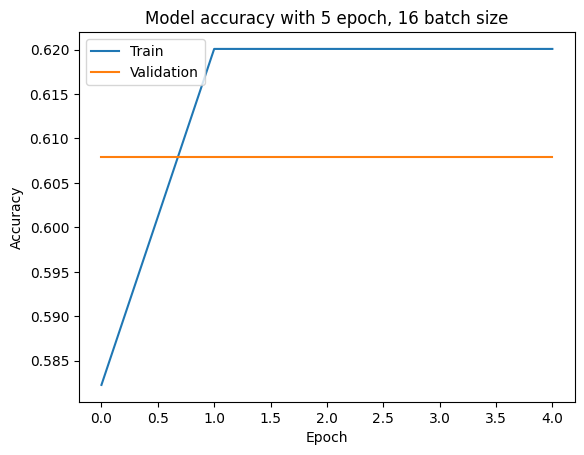

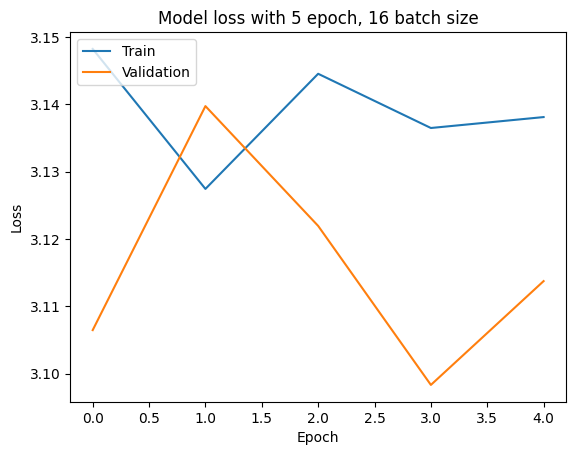

In [20]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values  
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title(f'Model accuracy with 5 epoch, 16 batch size')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('Model loss with 5 epoch, 16 batch size')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [ ]:
# model1.save('letnet.h5')

## Evalaution Metrics

25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step


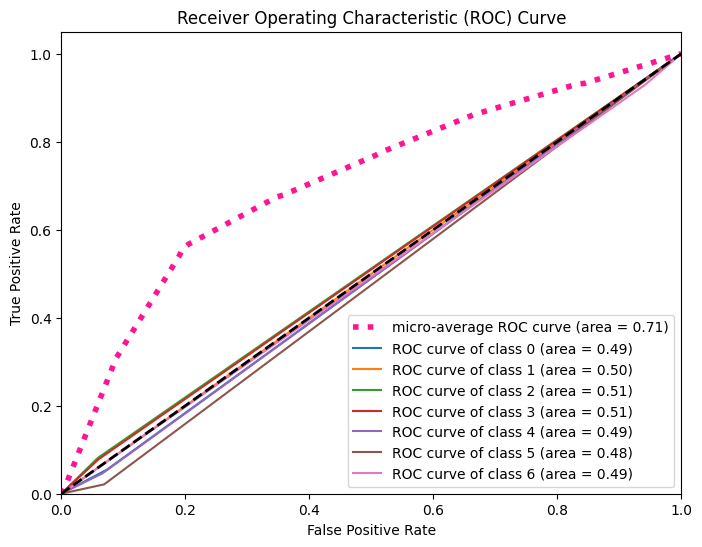

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, confusion_matrix

# 1. Get model predictions
y_pred = model1.predict(X_val)

# 2. Compute ROC curve and AUC
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = y_val.shape[1]

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_val[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_val.ravel(), y_pred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'
                                   ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', linewidth=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# 3. Compute confusion matrix
genres= df.iloc[:,3:].columns.to_list()
y_true_labels = np.argmax(y_val, axis=1)
y_pred_labels = np.argmax(y_pred, axis=1)
conf_matrix = confusion_matrix(y_true_labels, y_pred_labels)

# print("Confusion Matrix:")
# print(conf_matrix)


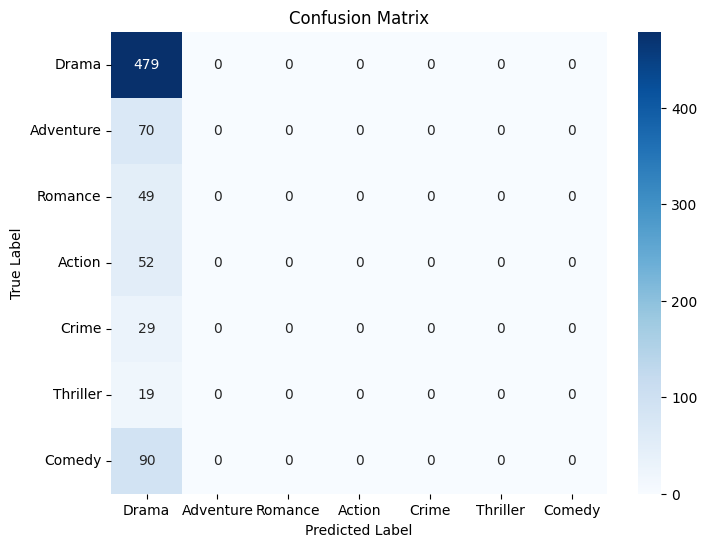

In [22]:
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=genres, yticklabels=genres)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [ ]:
model1.save('letnet.h5')

In [69]:
print("model") 
# 3. Define your model architecture (assuming LeNet)
model2 = LeNetModified2(num_classes=len(df.iloc[:,3:].columns))
print("compiling")
# 4. Compile the model
model2.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

print("fitting model")
# 5. Train the model
print(X_train.shape, y_train.shape)
history2 = model2.fit(X_train, y_train, epochs=4, batch_size=16,validation_data=(X_val, y_val))
#epoch 5, batch size=16: 35.6
print("eval")
# 6. Evaluate the model
loss, accuracy = model2.evaluate(X_val, y_val)
print("Validation accuracy:", accuracy)

model
compiling
fitting model
(3148, 1, 224, 224) (3148, 6)
Epoch 1/4
197/197 ━━━━━━━━━━━━━━━━━━━━ 16s 76ms/step - accuracy: 0.5901 - loss: 2.0804 - val_accuracy: 0.6061 - val_loss: 1.9947
Epoch 2/4
197/197 ━━━━━━━━━━━━━━━━━━━━ 15s 75ms/step - accuracy: 0.5735 - loss: 2.0532 - val_accuracy: 0.6417 - val_loss: 1.9808
Epoch 3/4
197/197 ━━━━━━━━━━━━━━━━━━━━ 16s 79ms/step - accuracy: 0.6039 - loss: 2.0154 - val_accuracy: 0.6417 - val_loss: 1.9771
Epoch 4/4
197/197 ━━━━━━━━━━━━━━━━━━━━ 15s 76ms/step - accuracy: 0.6231 - loss: 1.9344 - val_accuracy: 0.6417 - val_loss: 1.9956
eval
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.6264 - loss: 1.9714
Validation accuracy: 0.6416772603988647


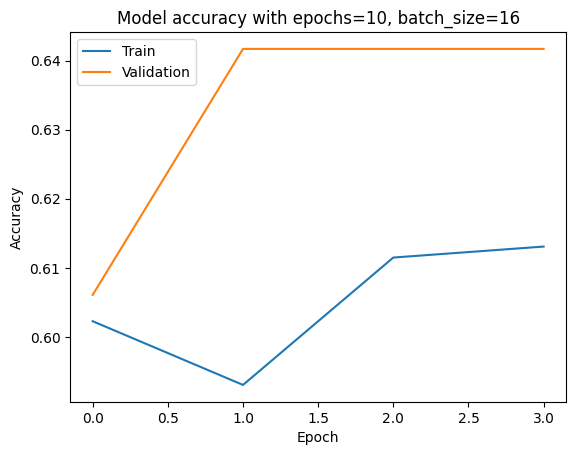

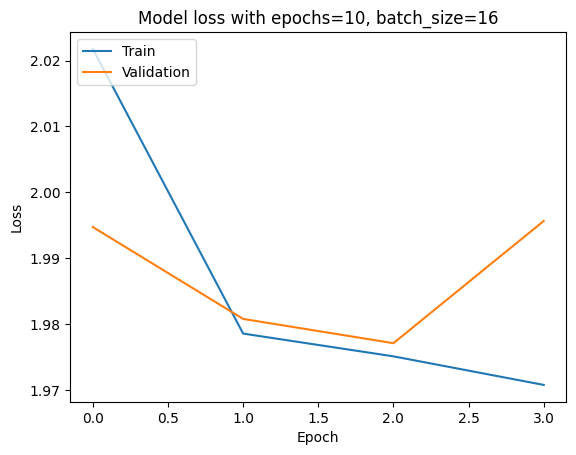

In [90]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values  
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('Model accuracy with epochs=10, batch_size=16')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Model loss with epochs=10, batch_size=16')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


## Prediction

In [23]:
import urllib.request
from PIL import Image
from io import BytesIO
def show(preprocessed_image):
    import matplotlib.pyplot as plt
    processed_image = tf.image.convert_image_dtype(preprocessed_image, tf.uint8)

    # Convert the processed image tensor to NumPy array
    processed_image_np = processed_image.numpy()

    # Plot the processed image using Matplotlib
    plt.imshow(processed_image_np) 
    
def preprocess_image(image_path):
    # Open image
    try:
      with urllib.request.urlopen(image_path) as response:
          data = response.read()
          img = Image.open(BytesIO(data))
    except:
        img = Image.open(image_path)
    #img = Image.open(image_path)
    # Resize to 32x32 pixels
    img = img.resize((224, 224))
    img = img.convert('RGB')
        # Convert to grayscale
    img = img.convert('L')
        # Convert image to numpy array
    img_array = np.array(img)
        # Normalize pixel values to [0, 1]
    img_array = img_array / 255.0
        # Add batch dimension
    img_array = np.expand_dims(img_array, axis=0)
    return img_array

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
[[0.054795000702142715, 0.05799202248454094, 0.22914579510688782, 0.02148485742509365, 0.06936652958393097, 0.012168672867119312, 0.06403844803571701, 0.017137078568339348, 0.47387149930000305]]
8 0.47387149930000305 Drama
2 0.22914579510688782 Comedy
4 0.06936652958393097 Romance


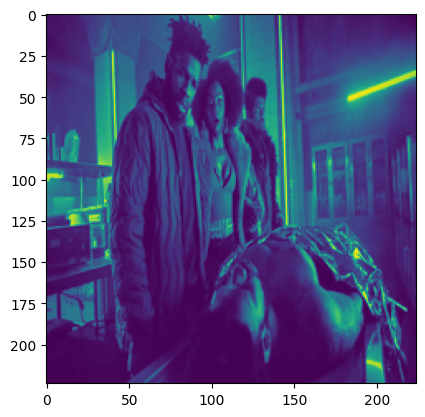

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
[[0.05479702353477478, 0.057995762676000595, 0.22913827002048492, 0.021483948454260826, 0.06936749815940857, 0.012168483808636665, 0.06404001265764236, 0.01713673025369644, 0.47387224435806274]]
8 0.47387224435806274 Drama
2 0.22913827002048492 Comedy
4 0.06936749815940857 Romance


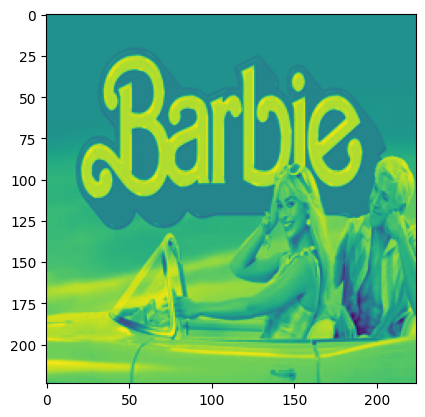

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
[[0.05479582026600838, 0.05799249932169914, 0.22914373874664307, 0.021484768018126488, 0.06936544924974442, 0.012168413028120995, 0.06404013931751251, 0.017136434093117714, 0.47387269139289856]]
8 0.47387269139289856 Drama
2 0.22914373874664307 Comedy
4 0.06936544924974442 Romance


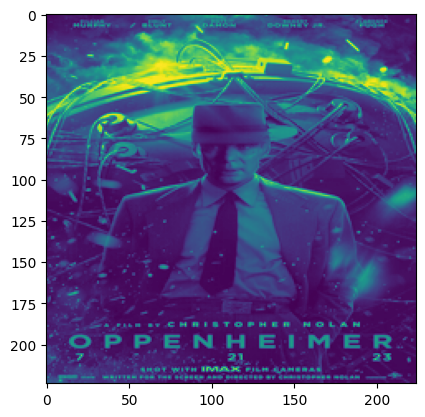

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
[[0.05479706823825836, 0.057995811104774475, 0.22913214564323425, 0.02148372121155262, 0.06936490535736084, 0.012168529443442822, 0.06404294073581696, 0.017135469242930412, 0.4738794267177582]]
8 0.4738794267177582 Drama
2 0.22913214564323425 Comedy
4 0.06936490535736084 Romance


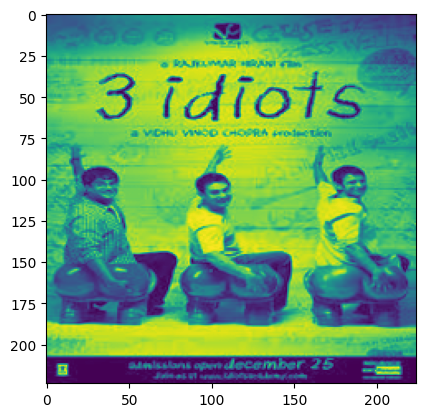

In [100]:
file4=r'https://media.timeout.com/images/106027003/1024/576/image.webp'
file3=r'C:\Users\mkolla1\OneDrive - Georgia State University\Desktop\Spring 2024\ML\Project\Images\download.jpg'
file1=r'https://movies.universalpictures.com/media/opr-tsr1sheet3-look2-rgb-3-1-1-64545c0d15f1e-1.jpg'
file=r'https://www.kenosha.com/wp-content/uploads/2023/08/et00072466-jjadjvahwx-landscape-copy.png'
file2=r'https://theobjectivestandard.com/wp-content/uploads/2022/03/3-Idiots-Written-and-Directed-by-Rajkumar-Hirani-2048x1216.jpg'
genres= df.iloc[:,3:].columns.to_list()
files=[file4, file, file1, file3]
for x in files:
    preprocessed_image = preprocess_image(x)
    
    predictions = model4.predict(preprocessed_image)
    predictions=predictions.tolist()
    classes=[]
    for x in predictions:
        for y in x:
            classes.append(y)
    i=0
    print(predictions)
    while i!=3:
        print(classes.index(max(classes)), max(classes), genres[classes.index(max(classes))])
        classes[classes.index(max(classes))]= -1000
        i+=1
    plt.imshow(preprocessed_image.reshape(224, 224))  # Assuming the image is grayscale
    plt.show()
    #show(preprocessed_image.reshape(224, 224))
#[0.05262700095772743, 0.13294711709022522, 0.01912735402584076, 0.05586215481162071, 0.05708613991737366